![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Baseball - Challenges

Now that you've gone through the introduction notebook and learned how to navigate Jupyter Notebooks, Python, and some useful libraries in pandas and Plotly, we can get a bit more creative with our questions. This notebook will expand on what you've learned and allow you to modify the code as you need. Don't be afraid to refer back to the previous notebook if you have any questions.

### Prep work

In [2]:
# Import/install libraries
import pandas as pd
import plotly.express as px
try:
    import pybaseball as pbb
except:
    !pip install pybaseball --user
    import pybaseball as pbb

In [7]:
# Import data
pitch_data = pd.read_csv('data/ale_pitch_data_june.csv')
pitch_data.head()


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2022-06-29,94.1,1.70,6.31,"Mayza, Tim",614173,641835,field_out,hit_into_play,...,3,6,3,6,3,Standard,Standard,136.0,-0.001,-0.568
1,SL,2022-06-29,89.0,1.94,6.24,"Mayza, Tim",614173,641835,NaN,ball,...,3,6,3,6,3,Standard,Standard,107.0,0.000,0.068
2,SL,2022-06-29,88.3,1.73,6.35,"Mayza, Tim",614173,641835,NaN,ball,...,3,6,3,6,3,Standard,Standard,119.0,0.000,0.054
3,SI,2022-06-29,94.5,1.70,6.33,"Mayza, Tim",657077,641835,double,hit_into_play,...,3,6,3,6,3,Standard,Standard,131.0,-0.260,1.761
4,SI,2022-06-29,94.4,1.73,6.46,"Mayza, Tim",657077,641835,NaN,foul,...,3,4,3,4,3,Standard,Standard,131.0,0.000,-0.046


In our baseball data here, we have 92 columns of data describing each pitch. In the previous notebook, we looked at only a few of those columns. Now we'll introduce more data, more techniques, and then let you get creative answering some more questions.

## Infield alignment

As data has became so prevalent in the sport of baseball, many aspects of the game have noticably changed. One that's been quite visible when watching the game in the past few years is the [infield shift](https://en.wikipedia.org/wiki/Infield_shift). The gist of the strategy is to position the infielders in areas of the diamond that will increase their chances of making an out. This is done for each batter, and starts with looking at the batter's hitting tendencies over a certain timeframe (i.e. career, season, month) and placing the infielders where the ball is most likely to get hit. MLB uses specific criteria to define each type of shift, but details can be found [here](https://www.mlb.com/glossary/statcast/shifts).

We can start by looking at how frequently infield shifting occurs in this dataset:

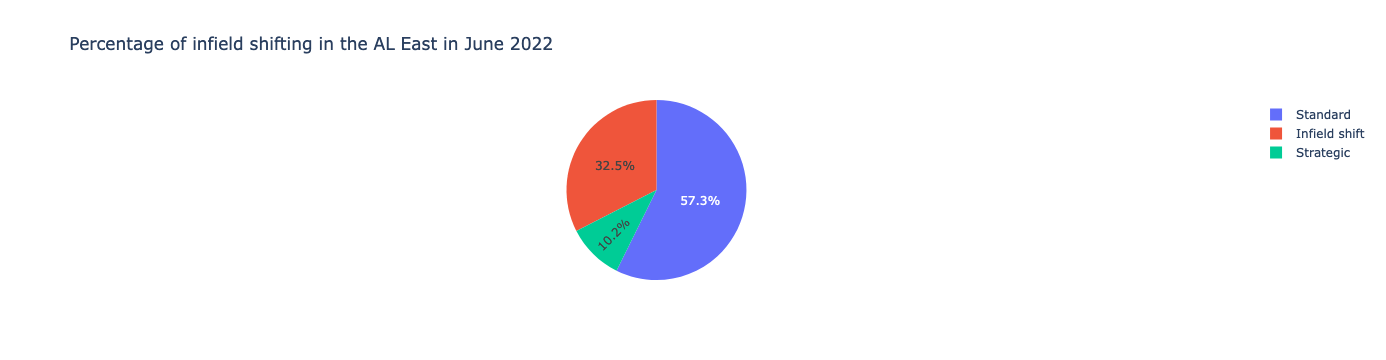

In [130]:
if_shift_perc = pitch_data['if_fielding_alignment'].value_counts(normalize=True) # Look at each option in `if_fielding_alignment` and calculate its percentage of the whole

# In pie chart form
px.pie(values=if_shift_perc, names=if_shift_perc.index, title='Percentage of infield shifting in the AL East in June 2022')

Starting in the 2023 season, MLB and the MLB Player's Association have agreed to add new rules that effectively ban infield shifting. As we can see from the pie chart above, shifting was only implemented a little less than half the time a batter came to the plate. Is it an effective strategy, or is the change in rules going to have a minimal impact on the game?

We can investigate that by looking at how many outs were made with shifting, versus those that were made without shifting. First, we have to look at plays only made by infielders. Thankfully, the data has a field that allows us to do that: `hit_location`. Values in this field are numbers that represent the *position* of the first defensive player to touch the ball, according to a numbering convention in baseball:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Baseball_positions.svg/1920px-Baseball_positions.svg.png width=400>
<p>
<a href='https://en.wikipedia.org/wiki/Baseball_positions'>https://en.wikipedia.org/wiki/Baseball_positions </a>
</p>

Therefore, we'll filter our data to only look at rows where the hit was to either the first baseman (3), second baseman (4), shortstop (6), or third baseman (5):

In [125]:
if_hits = pitch_data[pitch_data['hit_location'].isin([3, 4, 6, 5])] # Hits to the infielders only
if_hits

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2022-06-29,94.1,1.70,6.31,"Mayza, Tim",614173,641835,field_out,hit_into_play,...,3,6,3,6,3,Standard,Standard,136.0,-0.001,-0.568
6,SI,2022-06-29,92.4,1.79,6.48,"Mayza, Tim",593428,641835,grounded_into_double_play,hit_into_play,...,3,4,3,4,3,Strategic,Standard,136.0,0.190,-0.634
48,SL,2022-06-29,87.9,-1.46,6.29,"Romano, Jordan",657077,605447,field_out,hit_into_play,...,3,3,3,3,3,Infield shift,Standard,64.0,0.058,-0.158
55,SI,2022-06-29,86.3,-4.02,2.04,"Cimber, Adam",502110,643256,field_out,hit_into_play,...,2,3,2,3,2,Standard,Standard,281.0,0.016,-0.178
58,SI,2022-06-29,93.0,-2.07,5.75,"Manoah, Alek",608701,666201,field_out,hit_into_play,...,2,3,2,3,2,Standard,Standard,210.0,0.045,-0.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18208,FC,2022-06-02,85.9,-2.04,5.32,"Kluber, Corey",676646,446372,field_out,hit_into_play,...,3,3,0,0,3,Standard,Standard,193.0,-0.010,-0.114
18213,FC,2022-06-02,84.1,-2.20,5.52,"Kluber, Corey",666969,446372,field_out,hit_into_play,...,3,3,0,0,3,Standard,Standard,153.0,-0.025,-0.212
18225,FC,2022-06-02,86.2,-2.00,5.37,"Kluber, Corey",669701,446372,field_out,hit_into_play,...,3,3,0,0,3,Strategic,Standard,186.0,-0.016,-0.134
18245,FC,2022-06-02,87.5,-1.93,5.47,"Kluber, Corey",641680,446372,field_out,hit_into_play,...,1,1,0,0,1,Infield shift,Standard,214.0,-0.025,-0.212


The purpose of shifting the infielders is to stop the ball before it leaves the infield, and make an out. With the exception of some rare circumstances where hitters can get a hit *without* the ball leaving the infield, infield shifting generally fails when the ball is hit *through* the infield and is picked up by an outfielder.

To account for that, we'll also look at plays where the ball was first touched up by an outfielder. However, we need to make sure we only look at balls that *could* have been fielded by an infielder, assuming they were perfectly positioned. That means we need to look only at **ground balls** when counting outfield outs ([see here for types of batted balls](https://en.wikipedia.org/wiki/Batted_ball#Characterization)):

In [118]:
of_hits = pitch_data[(pitch_data['hit_location'].isin([7, 8, 9])) & (pitch_data['bb_type']=='ground_ball')] # Filter by both hits to the outfielders, as well as ground balls
of_hits

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
35,FF,2022-06-29,93.7,-1.53,6.05,"Romano, Jordan",614173,605447,single,hit_into_play,...,3,3,3,3,3,Infield shift,Standard,208.0,-0.179,0.529
93,SI,2022-06-29,94.2,-2.19,5.79,"Manoah, Alek",614173,666201,single,hit_into_play,...,1,1,1,1,1,Infield shift,Standard,217.0,-0.068,0.599
324,SL,2022-06-27,85.9,-2.06,6.09,"Anderson, Shaun",543877,641312,single,hit_into_play,...,7,1,7,1,7,Standard,Standard,109.0,-0.003,0.481
327,SL,2022-06-27,87.1,-1.91,6.01,"Anderson, Shaun",593428,641312,single,hit_into_play,...,7,0,7,0,7,Standard,Standard,127.0,-0.001,0.421
368,FS,2022-06-27,83.9,-2.51,5.87,"Gausman, Kevin",646240,592332,double,hit_into_play,...,7,0,7,0,7,Strategic,4th outfielder,229.0,-0.005,0.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18088,CH,2022-06-03,88.0,1.37,5.97,"McClanahan, Shane",673357,663556,single,hit_into_play,...,4,1,4,1,4,Standard,Standard,113.0,-0.038,0.318
18103,CH,2022-06-03,86.6,0.86,6.00,"McClanahan, Shane",683734,663556,single,hit_into_play,...,4,0,4,0,4,Standard,Standard,114.0,-0.053,0.906
18104,CU,2022-06-03,80.2,0.90,6.09,"McClanahan, Shane",572041,663556,single,hit_into_play,...,4,0,4,0,4,Infield shift,Standard,308.0,-0.029,0.439
18113,FF,2022-06-03,94.4,1.26,6.27,"McClanahan, Shane",544725,663556,single,hit_into_play,...,4,0,4,0,4,Standard,Standard,143.0,-0.028,0.395


Similarly, some balls fielded by infielders are less affected by where they've been positioned. Specifically, a 'pop-up' is a type of hit where the fielder has time to position themselves underneath the ball. Whether an infielder is shifted or not, they would have ample time to catch a pop-up, so we can remove those hits from our subsetted data.

This is also an opportunity to compare the **equality** operators in Python. The operator `==` is a comparison where you're checking if one variable is **equal to** another. Conversely, the operator `!=` is the opposite, only returning matches where the two variables being compared are **not equal**.

Below we're returning all results *except* those that equal 'popup':

In [127]:
if_hits = if_hits[if_hits['bb_type']!='popup']  # Note how we're also overwriting the dataframe by using the same name
if_hits

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2022-06-29,94.1,1.70,6.31,"Mayza, Tim",614173,641835,field_out,hit_into_play,...,3,6,3,6,3,Standard,Standard,136.0,-0.001,-0.568
6,SI,2022-06-29,92.4,1.79,6.48,"Mayza, Tim",593428,641835,grounded_into_double_play,hit_into_play,...,3,4,3,4,3,Strategic,Standard,136.0,0.190,-0.634
48,SL,2022-06-29,87.9,-1.46,6.29,"Romano, Jordan",657077,605447,field_out,hit_into_play,...,3,3,3,3,3,Infield shift,Standard,64.0,0.058,-0.158
55,SI,2022-06-29,86.3,-4.02,2.04,"Cimber, Adam",502110,643256,field_out,hit_into_play,...,2,3,2,3,2,Standard,Standard,281.0,0.016,-0.178
58,SI,2022-06-29,93.0,-2.07,5.75,"Manoah, Alek",608701,666201,field_out,hit_into_play,...,2,3,2,3,2,Standard,Standard,210.0,0.045,-0.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18195,FC,2022-06-02,86.4,-1.96,5.32,"Kluber, Corey",594777,446372,field_out,hit_into_play,...,3,3,1,1,3,Strategic,4th outfielder,199.0,-0.014,-0.114
18200,FC,2022-06-02,85.6,-2.01,5.30,"Kluber, Corey",669701,446372,field_out,hit_into_play,...,3,3,0,0,3,Infield shift,Standard,213.0,-0.017,-0.207
18208,FC,2022-06-02,85.9,-2.04,5.32,"Kluber, Corey",676646,446372,field_out,hit_into_play,...,3,3,0,0,3,Standard,Standard,193.0,-0.010,-0.114
18213,FC,2022-06-02,84.1,-2.20,5.52,"Kluber, Corey",666969,446372,field_out,hit_into_play,...,3,3,0,0,3,Standard,Standard,153.0,-0.025,-0.212


In [160]:
if_hits_perc = if_hits['if_fielding_alignment'].value_counts(normalize=True) # Calculate percentage of total values for each shifting strategy for infield hits
of_hits_perc = of_hits['if_fielding_alignment'].value_counts(normalize=True) # Do the same as above for outfield hits
all_hits_perc = pd.concat([if_hits_perc, of_hits_perc], axis=1, keys=['Infield', 'Outfield']) # Combine the two dataframes
all_hits_perc

,Infield,Outfield
Standard,0.579526,0.628571
Infield shift,0.309645,0.247619
Strategic,0.110829,0.123810


Now let's compare them side by side:

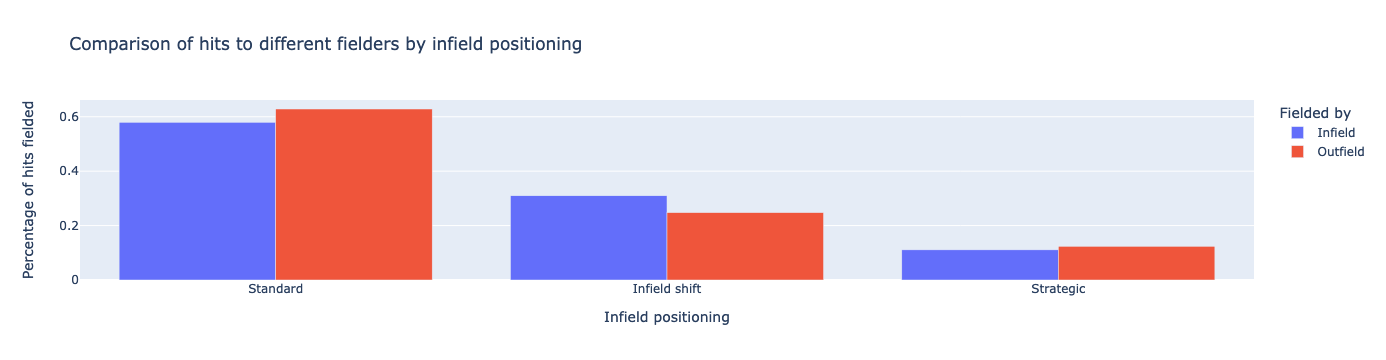

In [165]:
px.bar(all_hits_perc, y=all_hits_perc.columns, x=all_hits_perc.index, barmode='group', 
       title='Comparison of hits to different fielders by infield positioning', 
       labels={'value':'Percentage of hits fielded',
               'index':'Infield positioning',
               'variable':'Fielded by'})

The above plot may at first look confusing, but we can draw some conclusions from it. First off, teams shift much *less* frequently than they don't; over half the time balls are hit to either infielders or outfielders, it's during a standard infield positioning.

Secondly, and what we're trying to demonstrate, **when an infield shift is in place, more balls are hit to the infielders (versus ourfielders) than when it isn't**.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)